# ABOUT

For tests of Word Embedding on 'Primary Problem'


Datascientest's Datascientist continuous bootcamp - cohorte Mars2022 -  AeroBOT project

**Tutor**

* Alban THUET

**Authors:**

* Hélène ASSIR
* Hichem HADJI  
* [Ioannis STASINOPOULOS](https://www.linkedin.com/in/ioannis-stasinopoulos/)

</br>

---
</br>

**Version History**

Version | Date       | Author(s)  | Modification
--------|----------- | ---------  | --------------------------
X.X     | XX/XX/2022 | A.B        | modif
1.0     | 28/07/2022 | I.S        | Document creation

This notebook can be executed entirely. 

It

* mounts the GDrive of our AeroBot project @gmail account.

* loads the data from the `train_data_final.pkl` file (cf. `0_test_set_creator_DO_NOT_MODIFY_20220630.ipynb`) under a pandas DataFrame named `df`, which contains `97417` entries and 96 columns.
These data do not contain any more UAS-related entries.

* Performs Feature Engineering: one-hot-encoding of Anomaly using a naive approache, looking directly for the root label into the multiple modalities string of Anomaly
* A comparison of 2 approaches (Naive vs Regex, more complex) was performed, but, with very limited discrepancies between the 2 approaches, we favored the naive one (see : ATTEMPT_1_main_DO_NOT_MODIFY_20220704_Anomaly_ReGex.ipynb).  

Further processing of the data should be perfomed on this dataframe, after having **copied a version of the present notebook**.

# IMPORT PACKAGES


settings for  full / patial Narrative display. Helene?


In [ ]:
#######################
# Import packages
#######################
import numpy as np
import seaborn as sns
import math # for math.pi etc.
import time # time code execution

#######################
# Pandas
#######################
import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("display.colheader_justify","left") # left-justify the print output of pandas

### Display full columnwidth
# Set pandas settings to display full text columns
#pd.options.display.max_colwidth = None
# Restore pandas settings to display standard colwidth
pd.reset_option('display.max_colwidth')

import itertools # Pour créer des iterateurs

# Package to show the progression of pandas operations
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()
# simply use .progress_apply() instead of .apply() on your pd.DataFram

######################
# PLOTTING
######################
import matplotlib.pyplot as plt
%matplotlib inline
# # Define global plot parameters for better readability and consistency among plots
# # A complete list of the rcParams keys can be retrieved via plt.rcParams.keys() function
# plt.rcParams['axes.titlesize'] = 30
# plt.rcParams['axes.labelsize'] = 23
# plt.rcParams['xtick.labelsize'] = 23
# plt.rcParams['ytick.labelsize'] = 23
# plt.rc('legend', fontsize=23)    # legend fontsize

# BOKEH 
from bokeh.plotting import figure # Importation de la classe figure qui permet de créer un graphique bokeh.
from bokeh.io import  push_notebook, output_notebook, show
output_notebook() # permet d'afficher tous les futurs graphiques dans l'output d'une cellule jupyter. Si cette instruction n'est pas lancée, la figure s'affichera dans un nouvel onglet.
from bokeh.models import ColumnDataSource, Label
from bokeh.transform import dodge
from bokeh.models.tools import HoverTool

#####################
# NLP 
#####################
import re # for Regular Expression handling
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') # WordNet lemmatizer
nltk.download('omw-1.4') # necessary for WordNet lemmatizer
from nltk.tokenize import word_tokenize # Usual tokenizer
from nltk.tokenize import TweetTokenizer # Special tokenizer;  "we'll", "didn't", etc. are considered as one word
from sklearn.feature_extraction.text import CountVectorizer # Vectorization
from nltk.corpus import stopwords # Import stopwords from nltk.corpus
from nltk.stem.snowball import EnglishStemmer

###############################
# ML preprocessing and models
###############################
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble # random forest
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

###############################
# Deep Learning
###############################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras import callbacks

###############################
# Other
###############################
import pickle as pkl # Saving data externally

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# LOAD DATA

## Mount GDrive

In [ ]:
#@title
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#check your present working directory 
%pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'/content'

In [ ]:
#@title
# move to the transformed data location (you can create a deeper structure, if needed, e.g. to save a trained model):
%cd /content/drive/MyDrive/data/transformed/

/content/drive/MyDrive/data/transformed


In [ ]:
#@title
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

'Copy of Qualified abbreviations_20220718.xlsx.gsheet'
'Data Dictionnary.xlsx'
 df_metrics_DT_RAW.pkl
 model_results
 Narrative_PP_stemmed_24072022_TRAIN.pkl
 Narrative_Raw_Stemmed_24072022_TRAIN.pkl
 Narrative_RegEx_subst_21072022_TRAIN.pkl
'Qualified abbreviations_20220707_test.csv'
'Qualified abbreviations_20220708.csv'
'Qualified abbreviations_20220718.csv'
'Qualified abbreviations_20220718_Google_sheet.gsheet'
 test_data_final.pkl
 train_data_final.pkl


## Load data from .pkl file


In [ ]:
#@title
# Load the TRAIN data (97417 entries)
# Do not touch the TEST data until the end of the project!
# or the curse of the greek gods will fall upon you!

%cd /content/drive/MyDrive/data/transformed/
with open("train_data_final.pkl", "rb") as f:
    loaded_data = pkl.load(f)

df = loaded_data[0]
print("\nA Dataframe with", len(df), "entries has been loaded")

/content/drive/MyDrive/data/transformed

A Dataframe with 97417 entries has been loaded


# NARRATIVE ENGINEERING

### Load the pre-processed Narrative data 

See the notebook that performs the substitutions

In [ ]:
# Load the file Narrative_PP_stemmed_21072022_TRAIN.pkl
%cd /content/drive/MyDrive/data/transformed/
with open("Narrative_PP_stemmed_24072022_TRAIN.pkl", "rb") as f:
    loaded_narr = pkl.load(f)

df['Narrative_PP_stemmed'] = loaded_narr[0]
print("Data loaded")

/content/drive/MyDrive/data/transformed
Data loaded


In [ ]:
# Load the file Narrative_PP_stemmed_21072022_TRAIN.pkl
%cd /content/drive/MyDrive/data/transformed/
with open("Narrative_Raw_Stemmed_24072022_TRAIN.pkl", "rb") as f:
    loaded_narr = pkl.load(f)

df['Narrative_Raw_Stemmed'] = loaded_narr[0]
print("Data loaded")

/content/drive/MyDrive/data/transformed
Data loaded


# TARGET FEATURE ENGINEERING

## Anomaly

This section 

*   drops the entries with NaN in 'Anomaly'
*   creates and adds to the DataFrame 'df' a one-hot column for each Anomaly root label

Root labels are as defined in the ASRS coding form.pdf

We use a naive approach using string parsing 

### Drop the NaNs in Anomaly

In [ ]:
# Drop Anomaly NaN's
print(f"We have {len(df[df['Anomaly'].isna()])} entries where 'Anomaly' == NaN. We drop these entries")

df = df.dropna(axis = 0, how = 'any', subset = ['Anomaly'])
print(f"Current length of our DataFrame: {len(df)}")

We have 431 entries where 'Anomaly' == NaN. We drop these entries
Current length of our DataFrame: 96986


### One-hot encode Anomaly root labels

In [ ]:
# Root label (source = ASRS coding forms)
Anomaly_RootLabels=['Aircraft Equipment',
                    'Airspace Violation',
                    'ATC Issue',
                    'Flight Deck / Cabin / Aircraft Event',
                    'Conflict',
                    'Deviation - Altitude',
                    'Deviation - Speed',
                    'Deviation - Track / Heading',
                    'Deviation / Discrepancy - Procedural',
                    'Ground Excursion',
                    'Ground Incursion',
                    'Ground Event / Encounter',
                    'Inflight Event / Encounter',
                    'No Specific Anomaly Occurred']

#### Naive one-hot encoding

In [ ]:
# Create a column in the df corresponding to each Anomaly root label 'anomaly_rl'
Anomaly_RootLabels_columns = []
for anomaly_rl in Anomaly_RootLabels:
    col='Anomaly_' + anomaly_rl
    Anomaly_RootLabels_columns.append(col)
    # Fill the columns in a one-hot-encoding logic
    df[col] = df['Anomaly'].astype('str').apply(lambda x: 1 if (anomaly_rl in x)  else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
for anomaly_rl in Anomaly_RootLabels:
    col='Anomaly_'+anomaly_rl
    print('\n',col,'\n',df[col].value_counts())


 Anomaly_Aircraft Equipment 
 0    59054
1    37932
Name: Anomaly_Aircraft Equipment, dtype: int64

 Anomaly_Airspace Violation 
 0    92989
1     3997
Name: Anomaly_Airspace Violation, dtype: int64

 Anomaly_ATC Issue 
 0    81232
1    15754
Name: Anomaly_ATC Issue, dtype: int64

 Anomaly_Flight Deck / Cabin / Aircraft Event 
 0    89839
1     7147
Name: Anomaly_Flight Deck / Cabin / Aircraft Event, dtype: int64

 Anomaly_Conflict 
 0    79622
1    17364
Name: Anomaly_Conflict, dtype: int64

 Anomaly_Deviation - Altitude 
 0    88110
1     8876
Name: Anomaly_Deviation - Altitude, dtype: int64

 Anomaly_Deviation - Speed 
 0    94398
1     2588
Name: Anomaly_Deviation - Speed, dtype: int64

 Anomaly_Deviation - Track / Heading 
 0    88707
1     8279
Name: Anomaly_Deviation - Track / Heading, dtype: int64

 Anomaly_Deviation / Discrepancy - Procedural 
 1    58337
0    38649
Name: Anomaly_Deviation / Discrepancy - Procedural, dtype: int64

 Anomaly_Ground Excursion 
 0    94829
1     

In [ ]:
# Plots
# # Parsing de la colonne 'Anomaly' et top 200 des modalités selon le 1/0 encoding
# for anomaly_rl in Anomaly_RootLabels:
#     col='Anomaly_'+anomaly_rl
    
#     title_plot=col +' : ' + str(sum(df[col]))+' entries of our DF'
#     Anomaly=df[df[col]==1]['Anomaly'].str.split('; ', expand=True).stack().reset_index(drop=True)
#     fig, ax = plt.subplots(figsize=(15,30))
#     sns.countplot(y=Anomaly, order=Anomaly.value_counts().iloc[:50].index,color='green').set(title=title_plot);

#     title_plot='NO '+col +' : ' + str(len(df)-sum(df[col]))+' entries of our DF'
#     Anomaly=df[df[col]==0]['Anomaly'].str.split('; ', expand=True).stack().reset_index(drop=True)
#     fig, ax = plt.subplots(figsize=(15,30))
#     sns.countplot(y=Anomaly, order=Anomaly.value_counts().iloc[:50].index,color='red').set(title=title_plot);

# PREDICTION

In [ ]:
# Join all tokens into a single string
# Do this AFTER Target feature engineering, because the latter drops some entries with NaN for Anomaly
df['Narrative_Raw_Stemmed_str'] = df['Narrative_Raw_Stemmed'].apply(lambda token_list: ' '.join(entry for entry in token_list))
df['Narrative_PP_stemmed_str'] = df['Narrative_PP_stemmed'].apply(lambda token_list: ' '.join(entry for entry in token_list))

## WordEmbedding - WRONG




### Primary Problem

In [ ]:
# Drop PrimaryProblem NaN's
print(f"We have {len(df[df['Primary Problem'].isna()])} entries where 'Primary Problem' == NaN. We drop these entries")

df = df.dropna(axis = 0, how = 'any', subset = ['Primary Problem'])
print(f"Current length of our DataFrame: {len(df)}")

We have 380 entries where 'Primary Problem' == NaN. We drop these entries
Current length of our DataFrame: 96606


In [ ]:
# initialize the objects necesseray function inputs
le = LabelEncoder() 
df['Primary Problem_encoded'] = le.fit_transform(df['Primary Problem'])
target = to_categorical(df['Primary Problem_encoded'])
data = df['Narrative_PP_stemmed_str']
num_classes = target.shape[1] # number of classes

In [ ]:
# Train-test split  
X_text_train, X_text_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size= 0.2, 
                                                    random_state = 12)

In [ ]:
# Instantiate a tensorflow tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 5000) # only the most common words are kept
tokenizer.fit_on_texts(X_text_train) # Updates internal vocabulary based on a list of texts


# Save the dictionary of correspondence between words and indices
word2idx = tokenizer.word_index

# Save the dictionary of correspondence between indices and words
idx2word = tokenizer.index_word

# Save the vocab size
vocab_size = tokenizer.num_words

# Map each review text into a sequence of integers (word indices)
# We use the vocab obtained from training on the X_text_train data to vectorize both the train and test data

# Transform every review into a sequence of integers (indices of the vocab)
X_train = tokenizer.texts_to_sequences(X_text_train)
X_test = tokenizer.texts_to_sequences(X_text_test)

In [ ]:
# Pad & truncate train and test sequences (texts transformed in numeric sequences) to make them of the same length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, # Liste des textes transformés en index
                                                        maxlen = 200, # Nombre maximal de mots dans un texte. See length analysis above
                                                        padding = 'post', # pad either before or after each sequence
                                                        truncating = 'post', # truncate either before or after each sequence
                                                        value=0.0) # with what to pad
# if maxlen is not provided, uses the length of the longest sequence in the list.

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen = 500, padding = 'post', truncating= 'post')

In [ ]:
# Build the model
model = Sequential()

model.add(Embedding(input_dim = 5000, output_dim = 200)) # The embedding matrix is a *trainable* parameter
model.add(GlobalAveragePooling1D()) # no parameters to tune; it's an advantage of GlobalAveragePooling1D
# Use global average pooling blocks as an alternative to a Flatten() layer 

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(rate = 0.3)) # prevents overfitting
model.add(Dense(units = num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 200)         1000000   
                                                                 
 global_average_pooling1d_1   (None, 200)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               51456     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 18)                4626      
                                                                 
Total params: 1,056,082
Trainable params: 1,056,082
Non-trainable params: 0
____________________________________________

In [ ]:
# Define CALLBACKS
TON = callbacks.TerminateOnNaN() # Callback that terminates training when a NaN loss is encountered

early_stopping = callbacks.EarlyStopping(monitor = 'val_categorical_crossentropy', 
                                         min_delta=0.01,
                                         patience = 5, 
                                         mode = 'min', 
                                         restore_best_weights = True, 
                                         verbose = 1)

lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                         patience = 2, 
                                         verbose = 2, # nombre d'informations qui seront affichées durant l'apprentissage
                                         mode = 'max')

In [ ]:
# Compile and fit the model

# Define loss function, with 'none' reduction type
# see https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy
cce = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)

model.compile(optimizer = 'adam', 
              loss = cce, # sparse_categorical_crossentropy because classif problem
              metrics = ['accuracy', 'CategoricalCrossentropy']) 

training_history = model.fit(X_train, y_train,
          validation_split = 0.2,
          epochs = 50, 
          batch_size = 32,
          callbacks = [TON, early_stopping],
          verbose = True)

# Use this crossentropy loss function when there are two or more label classes. 
# When using 'categorical_crossentropy', labels to be provided in a one_hot representation. 
# If you want to provide labels as integers, use SparseCategoricalCrossentropy loss. There should be # classes floating point values per feature.

Epoch 1/50
1933/1933 [==============================] - 10s 5ms/step - loss: 0.3892 - accuracy: 0.8571 - categorical_crossentropy: 0.3892 - val_loss: 2.3767 - val_accuracy: 0.5846 - val_categorical_crossentropy: 2.3766
Epoch 2/50
1933/1933 [==============================] - 9s 5ms/step - loss: 0.3593 - accuracy: 0.8698 - categorical_crossentropy: 0.3593 - val_loss: 2.5741 - val_accuracy: 0.5847 - val_categorical_crossentropy: 2.5740
Epoch 3/50
1933/1933 [==============================] - 9s 5ms/step - loss: 0.3349 - accuracy: 0.8799 - categorical_crossentropy: 0.3349 - val_loss: 2.5790 - val_accuracy: 0.5804 - val_categorical_crossentropy: 2.5789
Epoch 4/50
1933/1933 [==============================] - 9s 5ms/step - loss: 0.3159 - accuracy: 0.8873 - categorical_crossentropy: 0.3159 - val_loss: 2.7723 - val_accuracy: 0.5899 - val_categorical_crossentropy: 2.7722
Epoch 5/50
1933/1933 [==============================] - 9s 4ms/step - loss: 0.2923 - accuracy: 0.8965 - categorical_crossentrop

In [ ]:
print(model.metrics_names) # gives the display labels for the scalar outputs
# Score on test set
print(model.evaluate(X_test, y_test))

['loss', 'accuracy', 'categorical_crossentropy']
604/604 [==============================] - 2s 3ms/step - loss: 1.5834 - accuracy: 0.6168 - categorical_crossentropy: 1.5833
[1.5833665132522583, 0.6168098449707031, 1.5833014249801636]


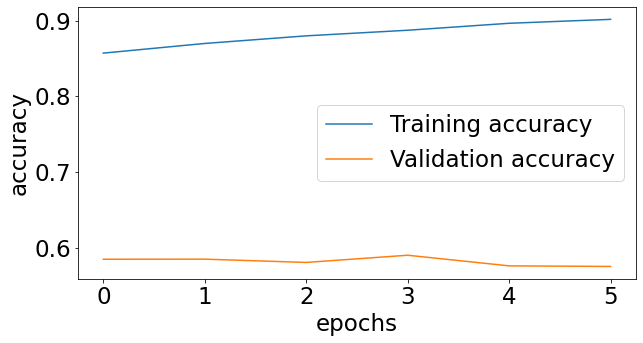

In [ ]:
# Plot the train history
fig = plt.figure(figsize = (10,5))
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

plt.plot(train_acc, label = 'Training accuracy')
plt.plot(val_acc, label = 'Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
# Predict 
test_pred = model.predict(X_test)
#  renvoie un vecteur de probabilités où chaque élément est la probabilité d'appartenance à la classe correspondant à son indice

test_pred_class = test_pred.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)

print(classification_report(y_test_class, test_pred_class))


              precision    recall  f1-score   support

           0       0.48      0.17      0.25       268
           1       0.73      0.83      0.78      4642
           2       0.40      0.20      0.27       305
           3       0.27      0.08      0.12       178
           4       0.21      0.05      0.09      1555
           5       0.31      0.20      0.25       337
           6       0.50      0.18      0.27      1107
           7       0.36      0.16      0.22       383
           8       0.00      0.00      0.00        57
           9       0.63      0.83      0.72      8463
          10       0.04      0.04      0.04        23
          11       0.00      0.00      0.00         5
          12       0.18      0.11      0.14        35
          13       0.04      0.02      0.03        50
          14       0.30      0.23      0.26      1298
          15       0.00      0.00      0.00         5
          16       0.11      0.03      0.05        29
          17       0.58    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
